In [64]:
from models.diffusion import Model
from main import dict2namespace
import numpy as np
import yaml
import torch 
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)


In [69]:
config = yaml.safe_load(open("configs/celeba.yml", "r"))
config = dict2namespace(config)
model = Model(config)

In [70]:
state_dict = torch.load('ckpt.pth', map_location="cuda:0")[0]
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)
model.to(device)

Model(
  (temb): Module(
    (dense): ModuleList(
      (0): Linear(in_features=128, out_features=512, bias=True)
      (1): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (down): ModuleList(
    (0): Module(
      (block): ModuleList(
        (0-1): 2 x ResnetBlock(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (temb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (attn): ModuleList()
      (downsample): Downsample(
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
      )
    )
    (1): Module(
      (block): ModuleList(
       

In [71]:
model.eval()
print("Model loaded")

Model loaded


In [76]:
n = 50
x = torch.randn(
                    n,
                    config.data.channels,
                    config.data.image_size,
                    config.data.image_size,
                    #device=device,
                )

In [77]:
torch.no_grad()

a, b = model(x.to(device), torch.ones(n).to(device))
#a.shape

In [78]:
print(a.shape)
print(b.shape)

torch.Size([50, 3, 64, 64])
torch.Size([50, 512, 4, 4])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


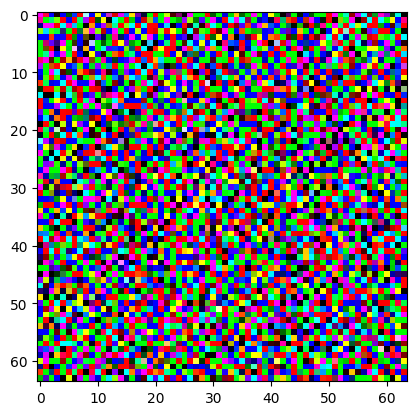

16381.32


In [80]:
image1 = a[0].cpu().detach().numpy().transpose(1,2,0)
plt.imshow(image1)
plt.show()
print(np.abs(image1).sum())

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = b.cpu().detach().numpy()
data.resize(n, b.shape[1]*b.shape[2]*b.shape[3])
print('X has shape: ', data.shape)


scaler = StandardScaler()
X_standardized = scaler.fit_transform(data)
pca = PCA(n_components=50)
pca.fit(X_standardized)
print(pca.explained_variance_ratio_)

X has shape:  (50, 8192)
[2.99951956e-02 2.93150470e-02 2.88503394e-02 2.72826459e-02
 2.69877836e-02 2.57661492e-02 2.53822673e-02 2.48199236e-02
 2.44881362e-02 2.42867470e-02 2.42014211e-02 2.34943610e-02
 2.32950728e-02 2.30213124e-02 2.25833561e-02 2.25293674e-02
 2.20325552e-02 2.17515249e-02 2.15444770e-02 2.11739168e-02
 2.08783969e-02 2.06939392e-02 2.04758625e-02 2.01733690e-02
 2.01526806e-02 1.98475868e-02 1.94549374e-02 1.91337857e-02
 1.89207010e-02 1.87800787e-02 1.83809176e-02 1.81659721e-02
 1.78171936e-02 1.75998937e-02 1.75610650e-02 1.72389578e-02
 1.69506297e-02 1.68730095e-02 1.64894145e-02 1.63591709e-02
 1.60772391e-02 1.56285614e-02 1.55790728e-02 1.54182157e-02
 1.50751024e-02 1.47194825e-02 1.45728868e-02 1.43474499e-02
 1.38328392e-02 2.85361800e-16]


In [82]:
pca.singular_values_

array([1.1084236e+02, 1.0957847e+02, 1.0870647e+02, 1.0571172e+02,
       1.0513892e+02, 1.0273175e+02, 1.0196359e+02, 1.0082777e+02,
       1.0015157e+02, 9.9738907e+01, 9.9563545e+01, 9.8098358e+01,
       9.7681419e+01, 9.7105751e+01, 9.6177650e+01, 9.6062614e+01,
       9.4997536e+01, 9.4389740e+01, 9.3939423e+01, 9.3128052e+01,
       9.2475883e+01, 9.2066475e+01, 9.1580078e+01, 9.0901100e+01,
       9.0854477e+01, 9.0164124e+01, 8.9267799e+01, 8.8527946e+01,
       8.8033615e+01, 8.7705864e+01, 8.6768784e+01, 8.6259956e+01,
       8.5427872e+01, 8.4905327e+01, 8.4811615e+01, 8.4030205e+01,
       8.3324524e+01, 8.3133530e+01, 8.2183105e+01, 8.1857895e+01,
       8.1149467e+01, 8.0009109e+01, 7.9882332e+01, 7.9468857e+01,
       7.8579643e+01, 7.7647270e+01, 7.7259644e+01, 7.6659729e+01,
       7.5272369e+01, 1.0811298e-05], dtype=float32)

In [83]:
reduced_data = pca.transform(X_standardized)
print(reduced_data.shape)
print(reduced_data[:5, 0])

reduced_data[:, 0] = reduced_data[:, 0] * 1.5
print(reduced_data[:5, 0])


orgi_data = pca.inverse_transform(reduced_data)
print(data[:5, 0])
print(orgi_data.shape)
print(orgi_data[:5, 0])

(50, 50)
[20.974722  14.517962  -9.924739  -2.9757018 18.239874 ]
[ 31.462082   21.776943  -14.887108   -4.4635525  27.35981  ]
[ 9.372487  14.018372  18.05909    5.691473   0.9065343]
(50, 8192)
[ 0.6327655   1.137396    1.4769106   0.07951427 -0.36333084]


In [84]:
print(pca.components_.shape)
print(pca.components_[1:5, 0])

(50, 8192)
[ 0.01168095 -0.00179645 -0.01168443 -0.01509783]


In [47]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a[:3, 0]

array([1, 4, 7])